# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
raw_data_train = pd.read_csv("train.csv")
raw_data_test = pd.read_csv("train.csv")
raw_data=pd.concat([raw_data_train,raw_data_test])
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
raw_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,2.917288e+06,2.917288e+06,2.917288e+06,2.917288e+06,2.917288e+06,2.917288e+06,2.917288e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987771e-01,1.314242e+00,7.090185e-02,3.288118e-02,7.064326e-02,3.589055e-02,5.237431e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Remove:
Traveling time less than 3 minute  
Traveling time more than 3 hours

In [4]:
data = raw_data[(raw_data.trip_duration>=180) & (raw_data.trip_duration<=10800)]

raw_data count:2917288
duration between 3mins-3hours:2769056


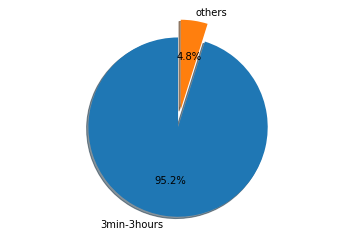

In [5]:
print("raw_data count:"+ 
      str(raw_data['id'].count())+
      "\nduration between 3mins-3hours:" + 
      str(data['id'].count()))
labels = ['3min-3hours','others']
explode = (0, 0.2)
plt.pie([raw_data['id'].count(),raw_data['id'].count()-data['id'].count()],explode=explode,
       shadow=True,autopct='%1.1f%%',startangle=90,labels=labels)
plt.axis('equal')
plt.show()

"name"    => "New York",
"min_lat" => 40.4772,
"max_lat" => 45.0153,
"min_lng" => -79.7624,
"max_lng" => -71.7517,

Remove:The latitude or longitude is beyond the boundary of New York City

In [6]:
data_inNY = data[(data.pickup_latitude>=40.4772) & (data.pickup_latitude<=45.0153) &
                (data.dropoff_latitude>=40.4772) & (data.dropoff_latitude<=45.0153) &
                (data.pickup_longitude>=-79.7624) & (data.pickup_longitude<=-71.7517) &
                (data.dropoff_longitude>=-79.7624) & (data.dropoff_longitude<=-71.7517)]

In [7]:
print("data_inNY count:"+ str(data_inNY['id'].count()))

data_inNY count:2768960


 # Feature Visulization

In [8]:
data_inNY.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,2.768960e+06,2.768960e+06,2.768960e+06,2.768960e+06,2.768960e+06,2.768960e+06,2.768960e+06
mean,1.535115e+00,1.667324e+00,-7.397349e+01,4.075065e+01,-7.397341e+01,4.075156e+01,8.739228e+02
std,4.987655e-01,1.314987e+00,3.877730e-02,2.831266e-02,3.753248e-02,3.295438e-02,6.541358e+02
min,1.000000e+00,0.000000e+00,-7.948790e+01,4.049620e+01,-7.955354e+01,4.047972e+01,1.800000e+02
25%,1.000000e+00,1.000000e+00,-7.399197e+01,4.073708e+01,-7.399138e+01,4.073536e+01,4.330000e+02
50%,2.000000e+00,1.000000e+00,-7.398189e+01,4.075372e+01,-7.397987e+01,4.075425e+01,6.920000e+02
75%,2.000000e+00,2.000000e+00,-7.396777e+01,4.076801e+01,-7.396326e+01,4.076936e+01,1.103000e+03
max,2.000000e+00,9.000000e+00,-7.188165e+01,4.391176e+01,-7.188165e+01,4.392103e+01,1.073100e+04


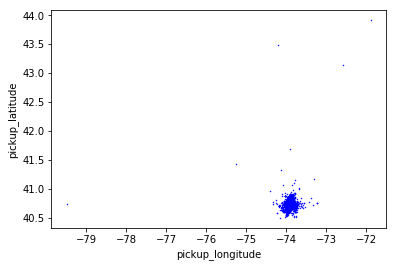

In [9]:
data_inNY.plot.scatter(x='pickup_longitude',y='pickup_latitude',s=0.1,color='b')

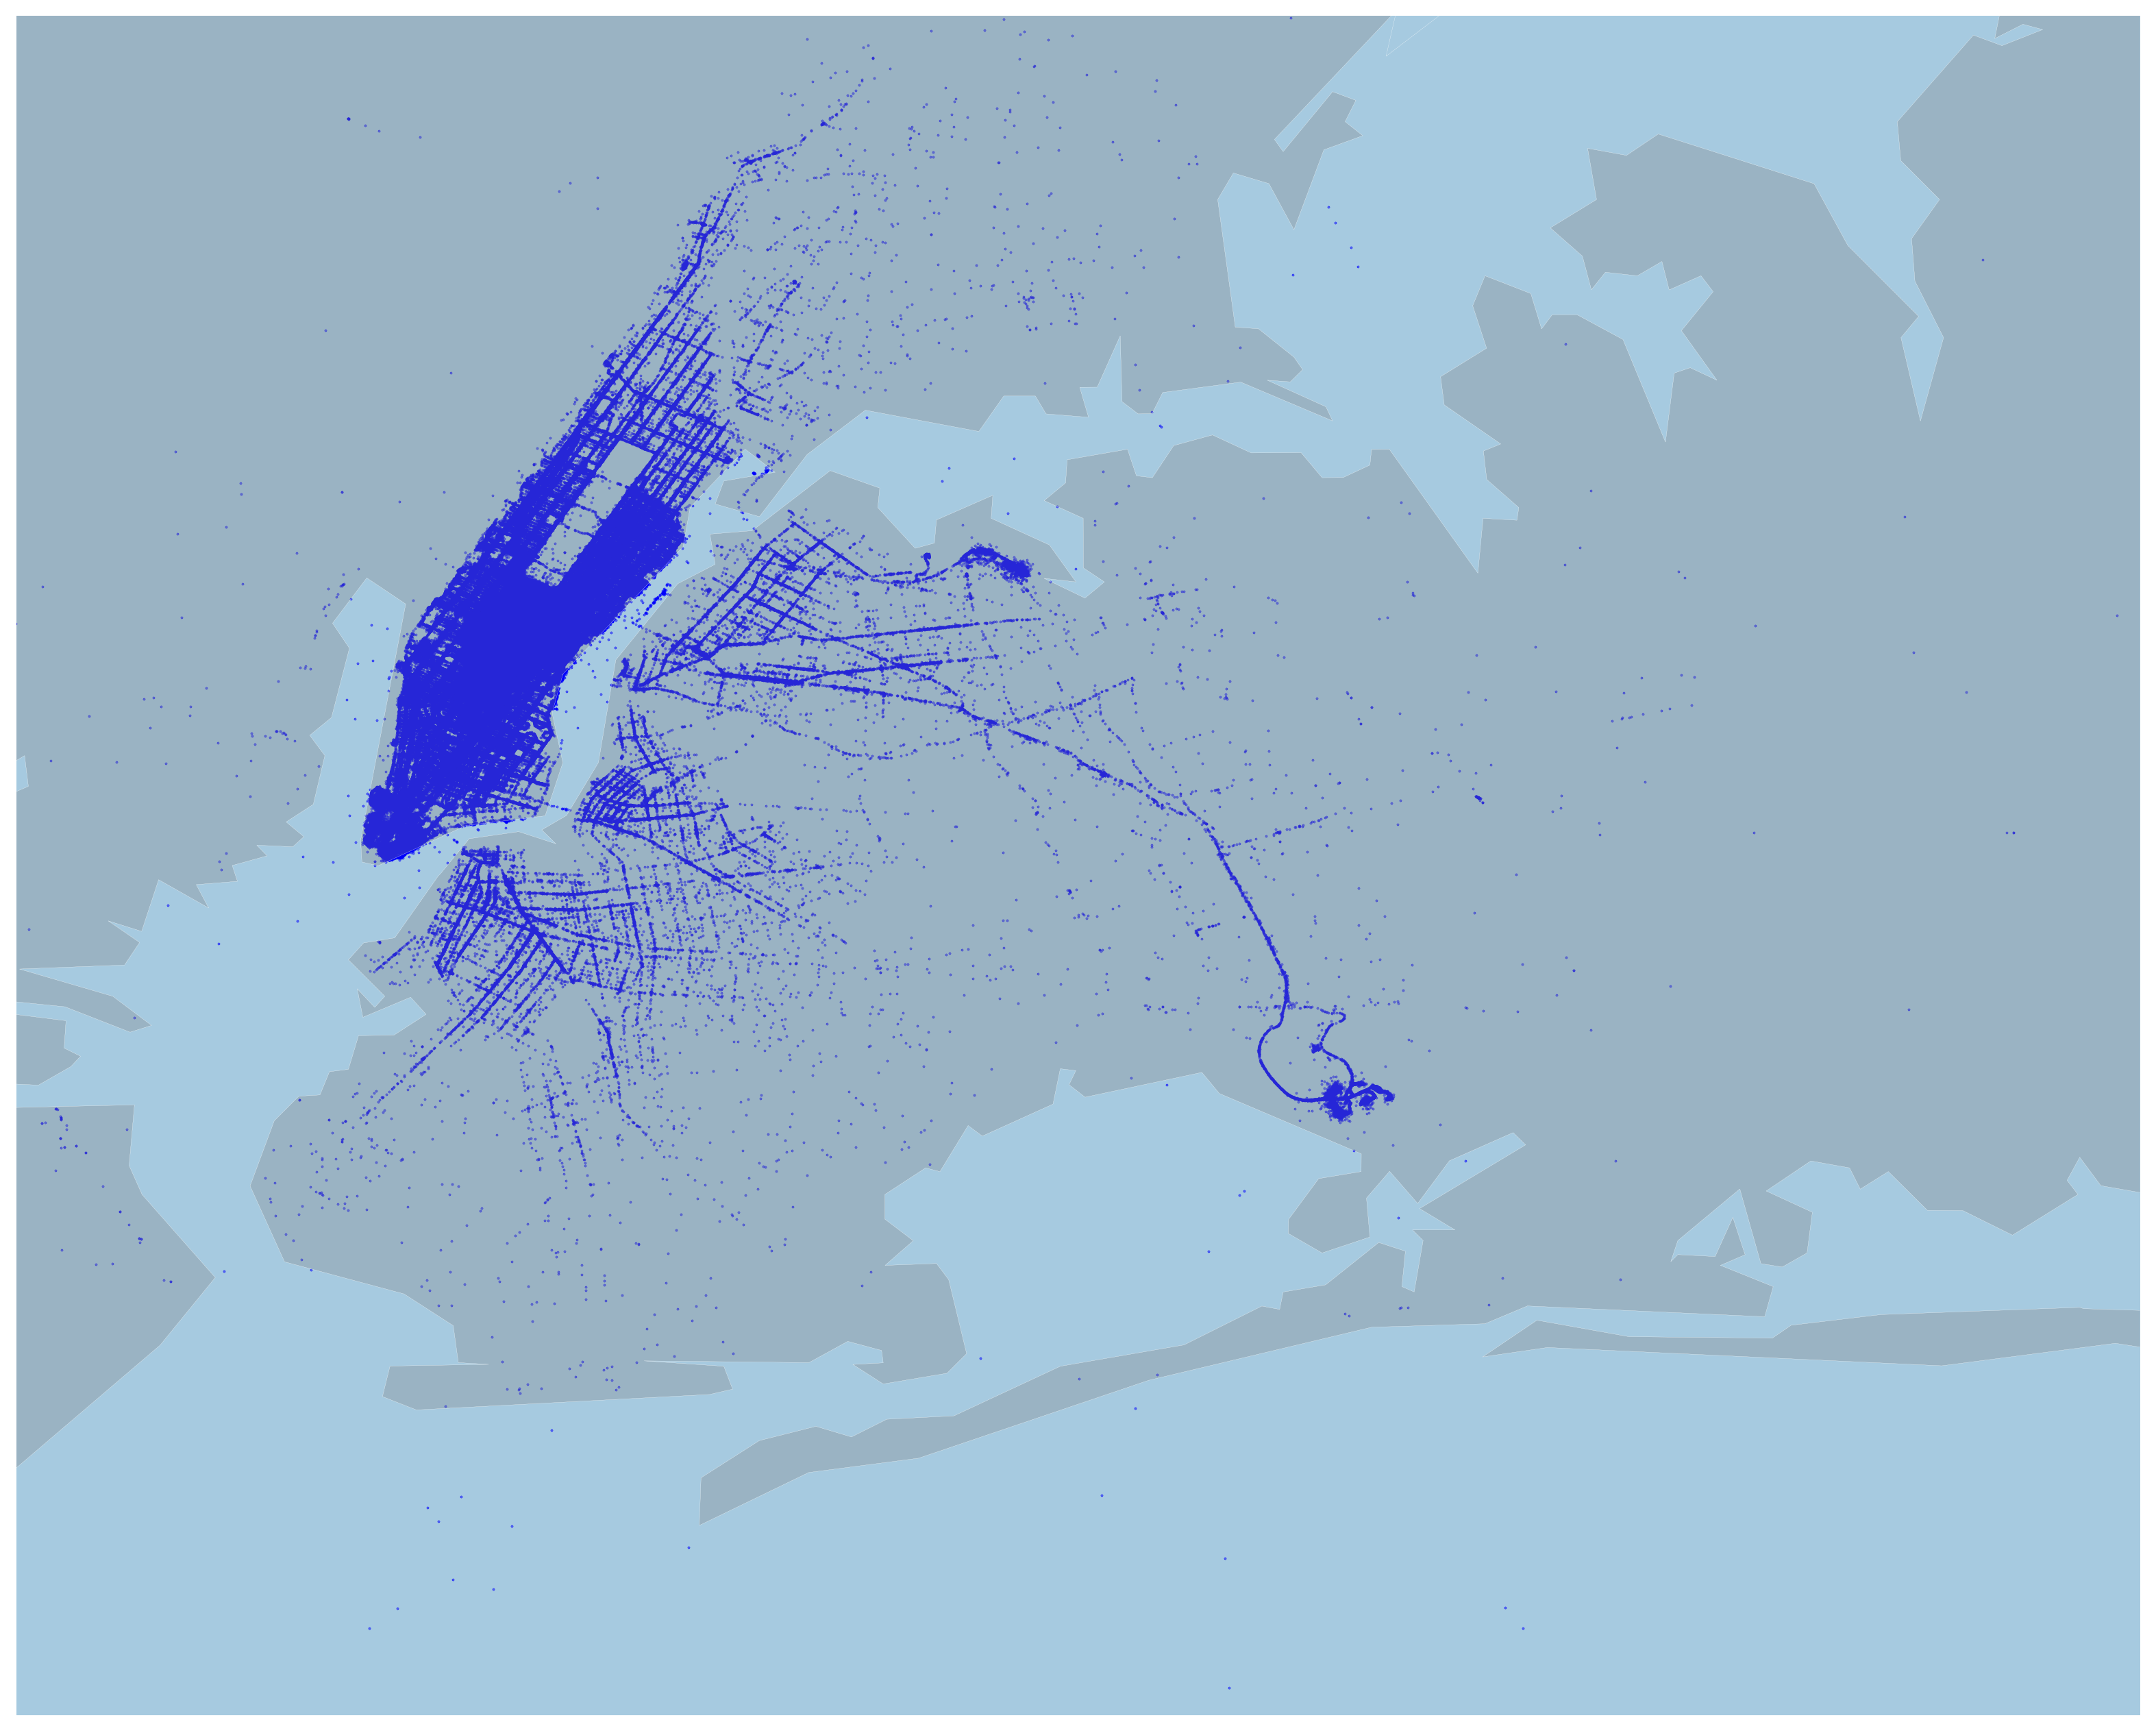

In [10]:
llon = -74.1
llat = 40.5
rlon = -73.6
rlat = 40.9

plt.figure(figsize=(20, 20), dpi=200)

m=Basemap(llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=rlon,urcrnrlat=rlat,resolution='h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(data_inNY['pickup_longitude'],data_inNY['pickup_latitude'],s=0.1,alpha=0.5,color='b')

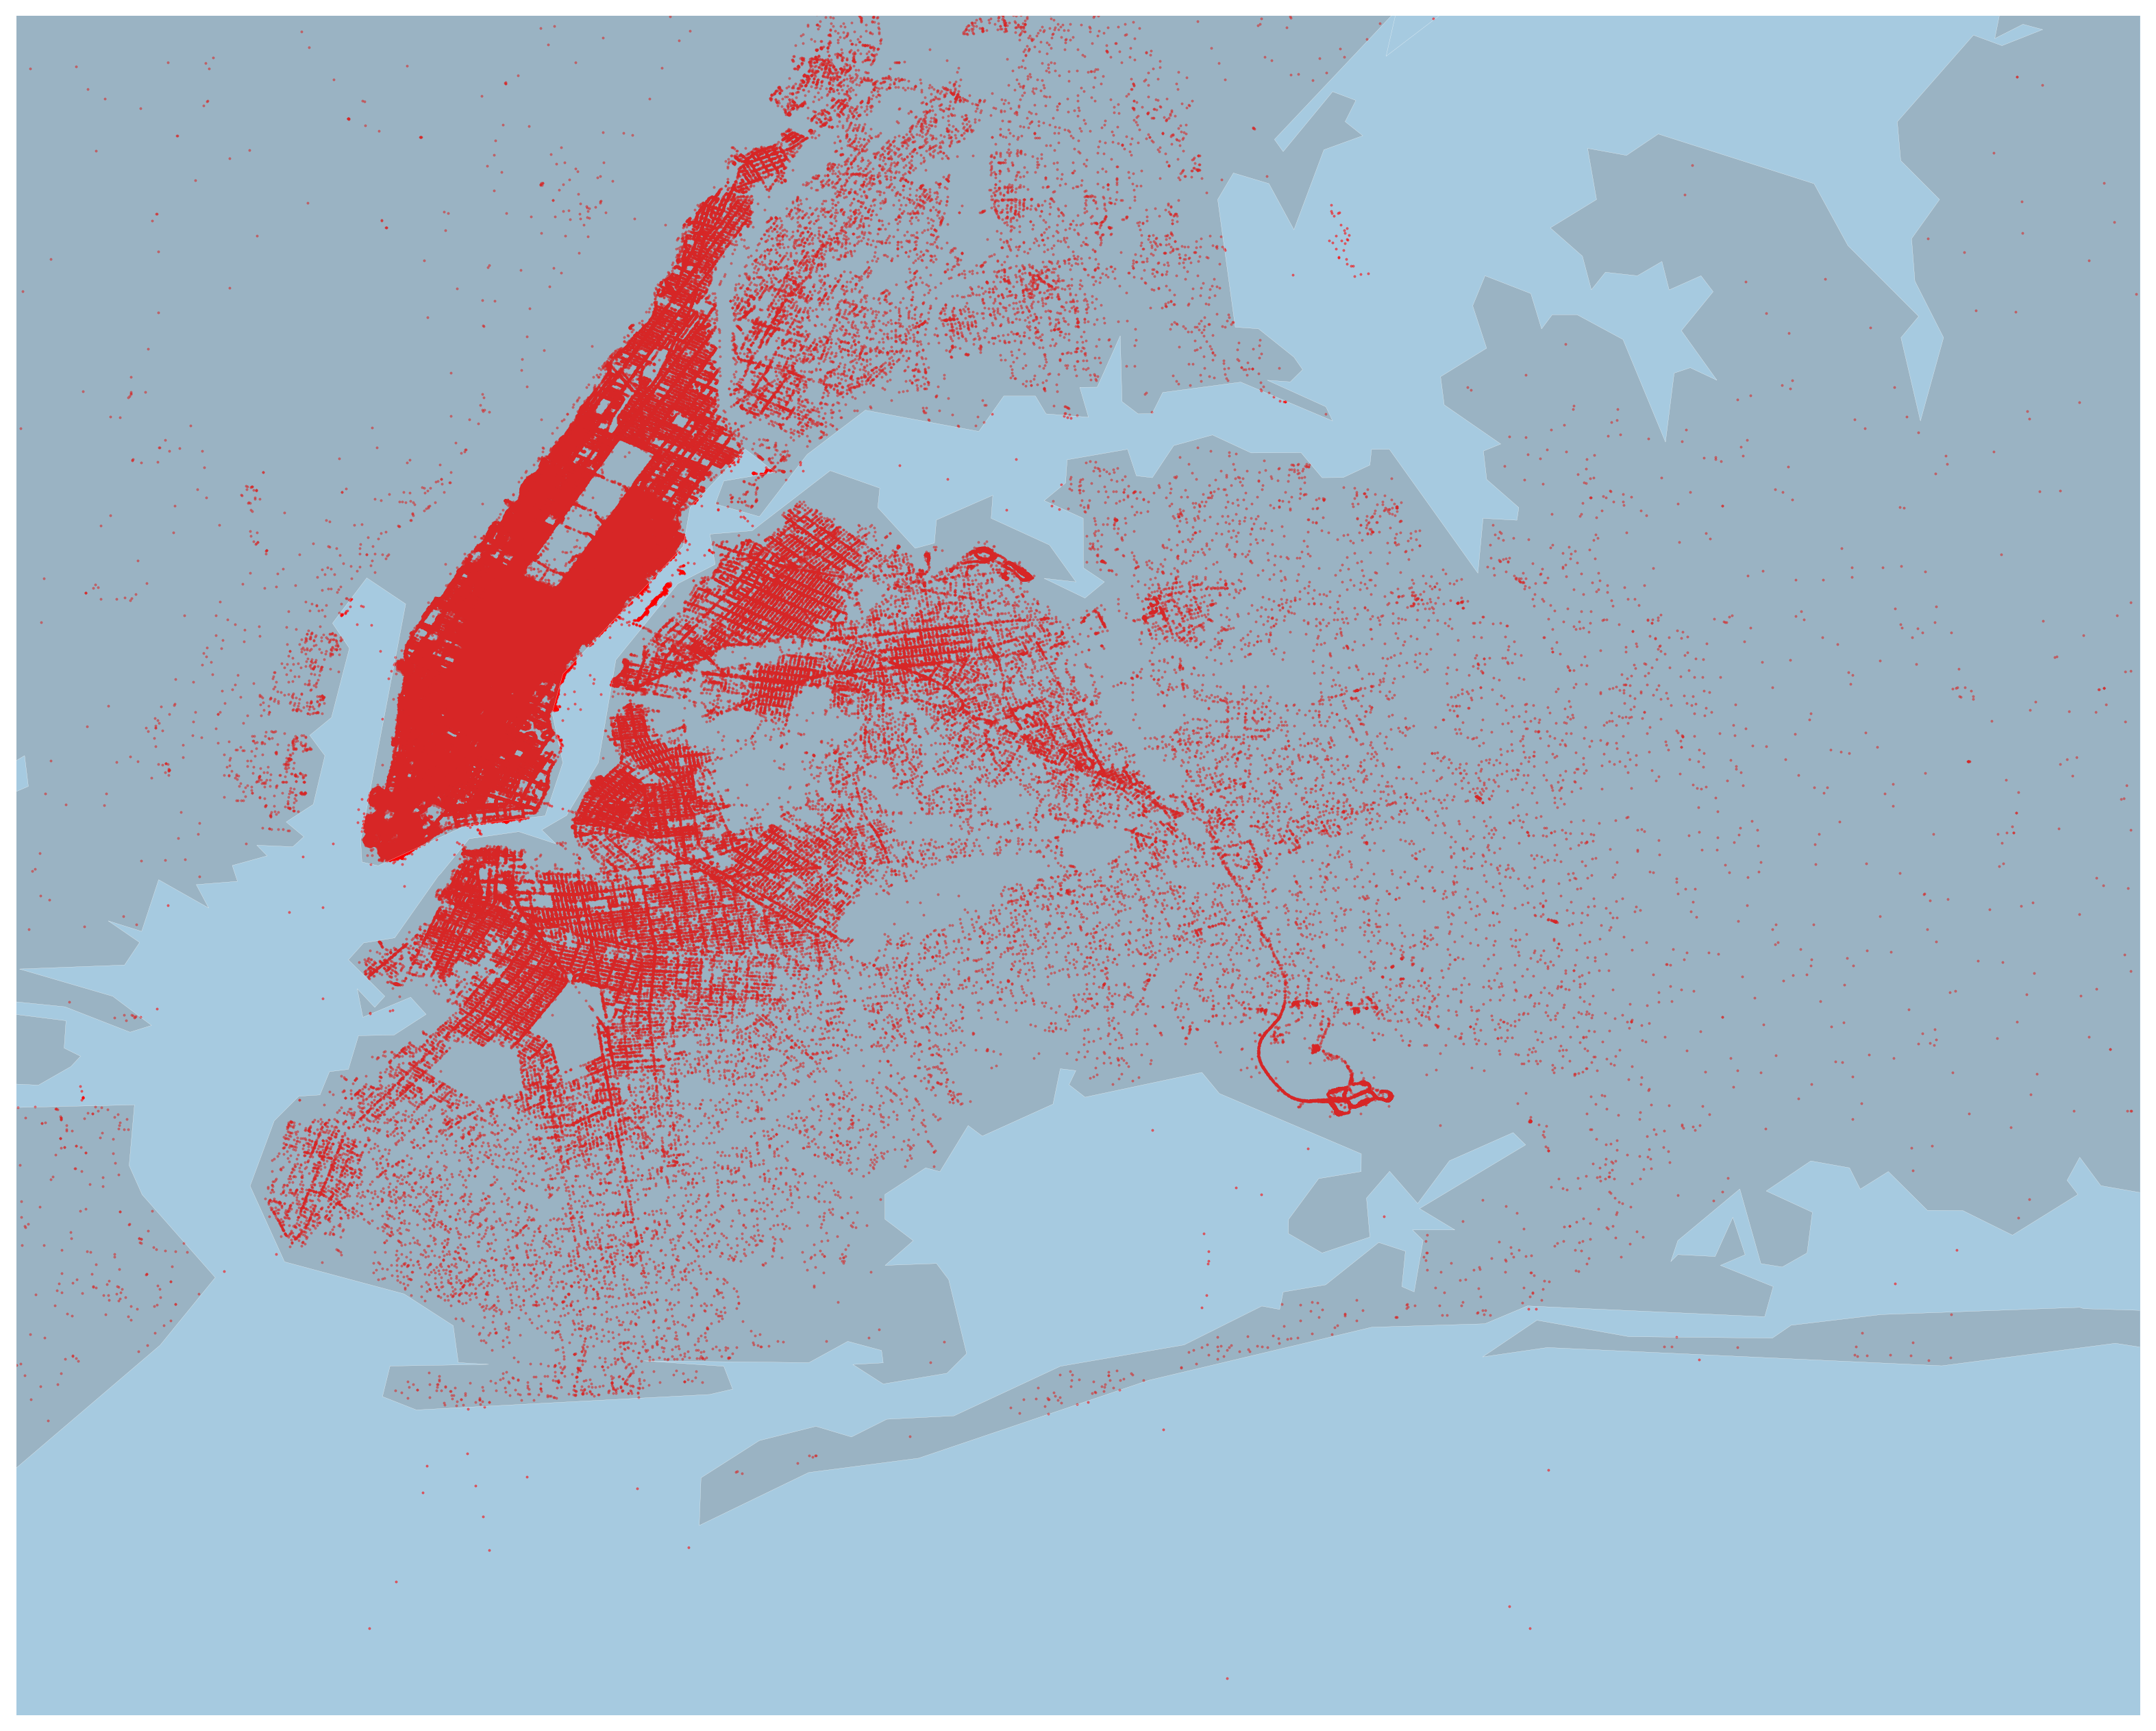

In [11]:
plt.figure(figsize=(20, 20), dpi=200)

m=Basemap(llcrnrlon=llon,llcrnrlat=llat,urcrnrlon=rlon,urcrnrlat=rlat,resolution='h')
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

m.scatter(data_inNY['dropoff_longitude'],data_inNY['dropoff_latitude'],s=0.1,alpha=0.5,color='r')

## Trip_duration distribution

In [12]:
x = data_inNY.trip_duration.values

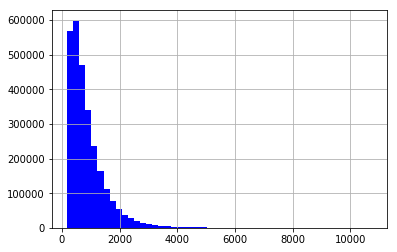

In [13]:
data_inNY['trip_duration'].hist(bins=50,color='b')

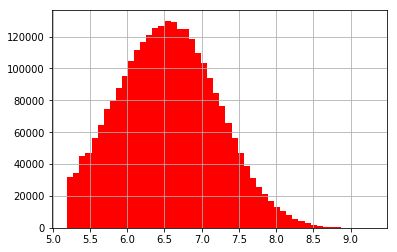

In [14]:
np.log(data_inNY['trip_duration']).hist(bins=50,color='r')

### Vendor_id and duration

In [15]:
venid_dur=data_inNY[['vendor_id','trip_duration']]

In [16]:
venid_dur.groupby('vendor_id').describe()

trip_duration                                                       \
                  count        mean         std    min    25%    50%     75%   
vendor_id                                                                      
1             1287248.0  868.935559  646.327175  180.0  432.0  690.0  1098.0   
2             1481712.0  878.255581  660.814322  180.0  434.0  694.0  1107.0   

                    
               max  
vendor_id           
1          10704.0  
2          10731.0

### Passager count and duration

In [17]:
pass_dur=data_inNY[['passenger_count','trip_duration']]

In [18]:
pass_des=pass_dur.groupby('passenger_count').describe()

In [19]:
pass_des

trip_duration                                                 \
                        count         mean         std    min    25%     50%   
passenger_count                                                                
0                        24.0  1339.583333  911.789588  310.0  547.0  1075.0   
1                   1957206.0   863.342890  643.287035  180.0  428.0   685.0   
2                    402354.0   910.508711  692.988611  180.0  446.0   716.0   
3                    114690.0   898.732706  669.479547  180.0  448.0   711.0   
4                     54468.0   919.540501  701.682693  180.0  451.0   721.0   
5                    148416.0   879.316907  653.570892  180.0  435.0   698.0   
6                     91800.0   872.238932  652.478379  180.0  432.0   691.5   
9                         2.0   560.000000    0.000000  560.0  560.0   560.0   

                                   
                     75%      max  
passenger_count                    
0                2101.75   3243.0  
1                1091.00  10704.0  
2                1146.00  10571.0  
3                1133.00  10451.0  
4                1156.00  10380.0  
5                1111.00  10731.0  
6                1099.00   8041.0  
9                 560.00    560.0

In [34]:
pass_des1=pass_des['trip_duration'].drop(['count','max'],axis=1)

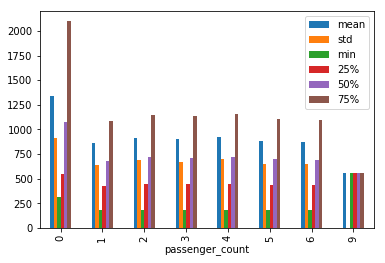

In [37]:
pass_des1.plot.bar()

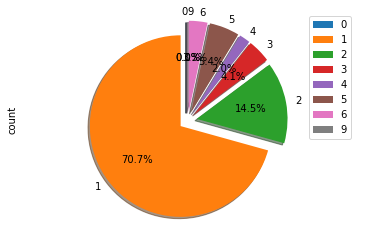

In [51]:
explode = np.ones(8)*0.1
pass_des['trip_duration'][['count']].plot.pie(x='passenger_count',y='count',explode=explode,
       shadow=True,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

### Vendor_id and passenger number

In [56]:
vendor_des=data_inNY.groupby('vendor_id').count()

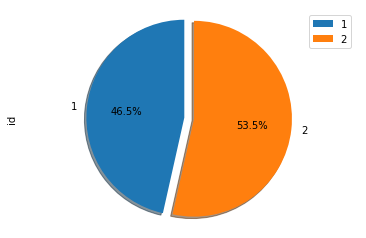

In [67]:
vendor_des.plot.pie(x='vendor_id',y='id',explode=(0.1,0), 
                    shadow=True,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()